**Have a look at our hypothetical web startup, MLAAS, which sells the service of providing machine learning algorithms via HTTP. With the increasing success of our company, the demand for better infrastructure also increases to serve all incoming web requests successfully. We don't want to allocate too many resources as that would be too costly. On the other hand, we will lose money if we have not reserved enough resources for serving all incoming requests. The question now is, when will we hit the limit of our current infrastructure, which we estimated being 100,000 requests per hour. We would like to know in advance when we have to request additional servers in the cloud to serve all the incoming requests successfully without paying for unused ones.
**

**Importing libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

flat files

In [7]:
dataset = pd.read_csv('./datasets/web_traffic.tsv',delimiter='\t',header=None) # comma seperated value -> delimiter is " , "

In [8]:
dataset.head() # display top five row

,0,1
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [9]:
dataset.columns = ['Hours','Hits']
dataset.head()

,Hours,Hits
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


**Step - 1: See the information of the dataset**

In [10]:
print(dataset.keys())
print(dataset.info())

Index(['Hours', 'Hits'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
Hours    743 non-null int64
Hits     735 non-null float64
dtypes: float64(1), int64(1)
memory usage: 11.7 KB
None


# Data Preprocessing
- Removing missing values

In [11]:
dataset = dataset.dropna(axis = 0)
dataset.head()

,Hours,Hits
0,1,2272.0
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0


**Step -2 : Co-relation**

In [12]:
dataset.corr()

,Hours,Hits
Hours,1.000000,0.645232
Hits,0.645232,1.000000


**Step-3: Converting dataframe into array**

In [13]:
print(dataset.info())
print(dataset.keys())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 742
Data columns (total 2 columns):
Hours    735 non-null int64
Hits     735 non-null float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB
None
Index(['Hours', 'Hits'], dtype='object')


X = dataset['Hours_Studied'].values # independent varibles
y = dataset['Test_Grade'].values # Dependent varibles

X = np.reshape(X, (len(X),1)) # coloumn matrix
y = np.reshape(y, (len(y),1)) # coloumn matrix

In [14]:
X = dataset.iloc[:,0:1].values # independent values
y = dataset.iloc[:,1:2].values # dependdent values

In [15]:
X.shape, y.shape

((735, 1), (735, 1))

**step-4: data visualisation using scatter**

plt.style.available

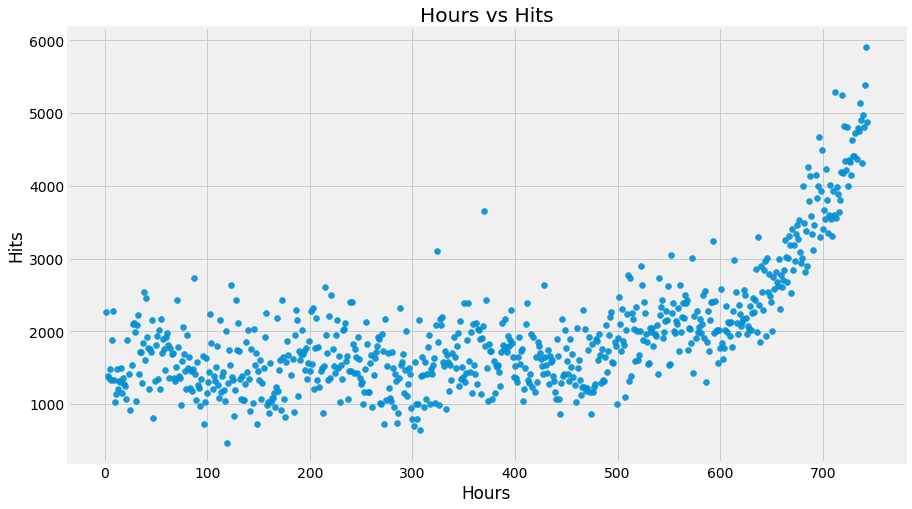

In [16]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
plt.scatter(X,y,alpha = 0.9)
plt.xlabel('Hours')
plt.ylabel('Hits')
plt.title('Hours vs Hits')
plt.show()

**Step - 5: Splitting Data into test and train sets**

In [17]:
from sklearn.cross_validation import train_test_split
# eg: train = 80% and test = 20 %

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2,
                                                    random_state = 0)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((588, 1), (147, 1), (588, 1), (147, 1))

**Step-6: Buiding machine learning model**

In [20]:
# scikit learn
from sklearn.linear_model import LinearRegression

In [21]:
preditor = LinearRegression()

In [22]:
preditor.fit(x_train,y_train) # traning

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
y_pred = preditor.predict(x_test) # evaluating model
y_full = preditor.predict(X) # for visualizing regression line 

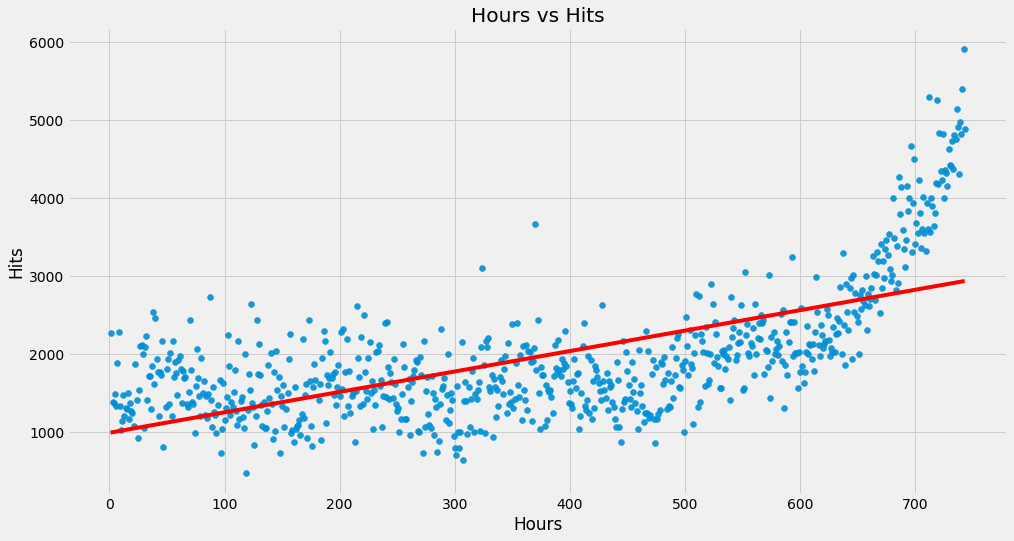

In [24]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
plt.scatter(X,y,alpha = 0.9)
plt.plot(X,y_full, 'r')

plt.xlabel('Hours')
plt.ylabel('Hits')
plt.title('Hours vs Hits')
plt.show()

**Evaluating Model**

In [25]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error

In [26]:
print('R2_score:',r2_score(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

R2_score: 0.42111780477482985
Mean Squared Error: 373037.6998627876
Mean Absolute Error: 449.05752984293383


# Application

In [27]:
b0 = preditor.intercept_
b1 = preditor.coef_

In [28]:
hours = (100000 - b0)/b1
hours

array([[37829.33431331]])

In [29]:
weeks = (hours- 743)/(24*7)
weeks

array([[220.75198996]])

# Polynomial regression

**Creating polynomial feature**

In [30]:
X2 = X**2 # x square
X3 = X**3 # x cube

*Creating new independent values*

- axis = 0 -> it will append rows
- axis = 1 -> it will append columns

In [31]:
X_poly2 = np.concatenate((X,X2),axis = 1) 
X_poly2

array([[     1,      1],
       [     3,      9],
       [     4,     16],
       ...,
       [   741, 549081],
       [   742, 550564],
       [   743, 552049]], dtype=int64)

# Building a polynomial regression degree = 2

In [32]:
poly_reg2 = LinearRegression()

In [33]:
poly_reg2.fit(X_poly2,y) # training for visualizing purpose

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_full2 = poly_reg2.predict(X_poly2)  

# Visualizing 

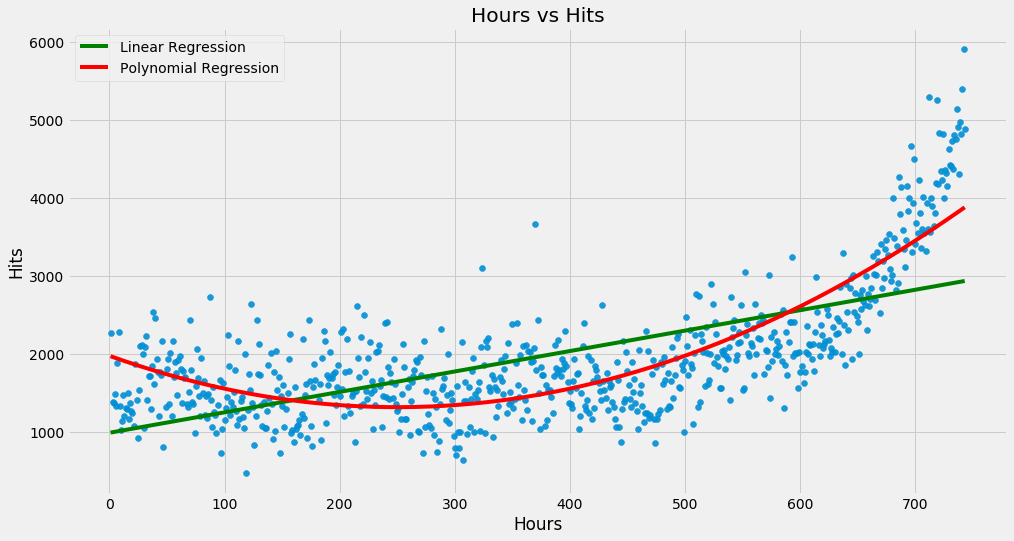

In [35]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
plt.scatter(X,y,alpha = 0.9)
plt.plot(X,y_full, 'g')
plt.plot(X,y_full2, 'r')

plt.xlabel('Hours')
plt.ylabel('Hits')
plt.title('Hours vs Hits')
plt.legend(['Linear Regression','Polynomial Regression'])
plt.show()

In [36]:
X_poly3 = np.concatenate((X,X2,X3),axis = 1) 
X_poly3

array([[        1,         1,         1],
       [        3,         9,        27],
       [        4,        16,        64],
       ...,
       [      741,    549081, 406869021],
       [      742,    550564, 408518488],
       [      743,    552049, 410172407]], dtype=int64)

# Building a polynomial regression degree = 3

In [37]:
poly_reg3 = LinearRegression()

In [38]:
poly_reg3.fit(X_poly3,y) # training for visualizing purpose

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
y_full3 = poly_reg3.predict(X_poly3)  

# Visualizing 

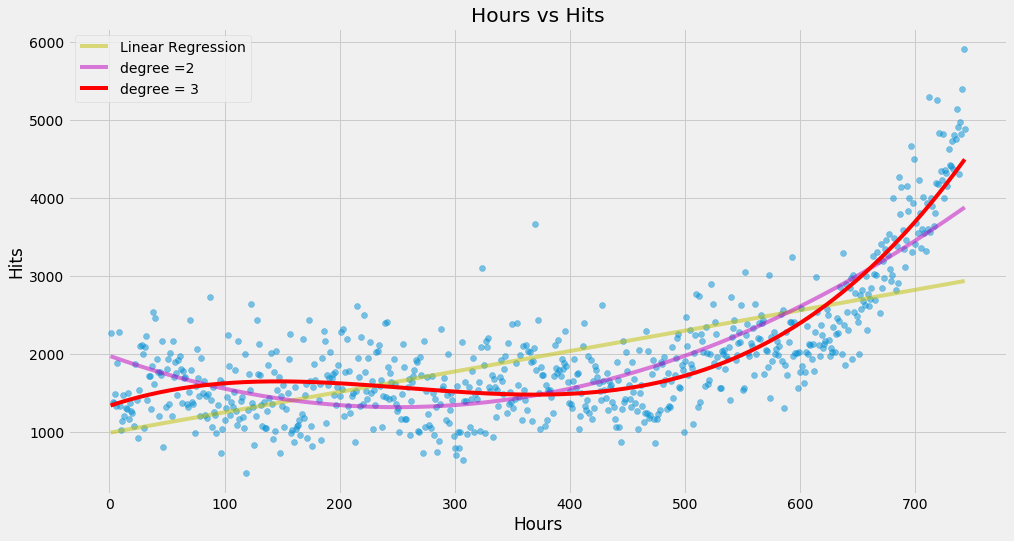

In [40]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
plt.scatter(X,y,alpha = 0.5)
plt.plot(X,y_full, 'y', alpha = 0.5)
plt.plot(X,y_full2, 'm', alpha = 0.5)
plt.plot(X,y_full3, 'r')

plt.xlabel('Hours')
plt.ylabel('Hits')
plt.title('Hours vs Hits')
plt.legend(['Linear Regression','degree =2','degree = 3'])
plt.show()

# Application

In [41]:
coef = poly_reg3.coef_
b0 = poly_reg3.intercept_

In [42]:
coef

array([[ 4.94226019e+00, -2.35893797e-02,  3.04960132e-05]])

In [43]:
b0

array([1333.28796551])

$ y = b_0 + b_1 X + b_2 X^2 + b_3 X^3 + ... + b_n X^n$

actually intercept = b0 - y
and remove complex numbers

In [54]:
# b3 b2 b1 b0
my_coef = [3.0496e-05 ,-2.3589e-2 , 4.9422,  1333.287-100000] 

In [55]:
my_coef

[3.0496e-05, -0.023589, 4.9422, -98666.713]

In [56]:
# cal roots
np.roots(my_coef)

array([1744.15000754   +0.        j, -485.31936369+1272.58212191j,
       -485.31936369-1272.58212191j])

*remove negative values and complex numbers **so, number of expected hours is approx $1744.15$*** 

In [58]:
hours = 1744.15
weeks = hours/(24*7)
print('Expected weeks:', int(weeks))

Expected weeks: 10


help(np.roots)

**Evaluating Model**

In [47]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error

In [48]:
print('R2_score:',r2_score(y,y_full3))
print('Mean Squared Error:',mean_squared_error(y,y_full3))
print('Mean Absolute Error:',mean_absolute_error(y,y_full3))

R2_score: 0.7437366099834488
Mean Squared Error: 189592.0326962248
Mean Absolute Error: 344.1036970490651


# Great Job